## Dataset

- We examine a tumor tissue sample from a triple-negative breast cancer patient, as described in [A Structured Tumor-Immune Microenvironment in Triple-Negative Breast Cancer Revealed by Multiplexed Ion Beam Imaging](https://www.cell.com/cell/fulltext/S0092-8674(18)31100-0).

- The dataset of sample, saved in CSV format in a GitHub repository, contains multiple cells with 36 protein expression levels and corresponding cell types.

- Objectives: 
    - 1) Cluster cells using 36 protein markers. Then, apply PCA to visualize the resulting clusters, ensuring that cell types and spatial coordinates are excluded from both the clustering analysis and PCA computation.
    - 2) Compare the clustering results with the cell types provided in the dataset.
    - 3) Visualize the clustering results with the spatial coordinates provided in the dataset or PCs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score


In [2]:
url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/mibi-tof-p4.csv"
df = pd.read_csv(url)
df.head(3)

,Unnamed: 0,betaCatenin,CD11b,CD11c,CD138,CD16,CD20,CD209,CD3,CD31,...,p53,panKeratin,PD1,PDL1,pS6,SMA,Vimentin,mm,centroidX,centroidY
0,Cell_1405,0.179704,0.0,0.008169,0.000000,0.0,0.613347,0.0,0.132795,0.000000,...,0.0,0.0,0.0,0.091083,0.572772,0.687374,0.568679,B,1889.086060,9.842593
1,Cell_1406,0.000000,0.0,0.334022,0.000000,0.0,0.676806,0.0,0.418529,0.000000,...,0.0,0.0,0.0,0.199693,0.549069,0.000000,0.548822,B,1978.837036,8.857988
2,Cell_1407,0.000000,0.0,0.000000,0.101044,0.0,0.287680,0.0,0.116963,0.147027,...,0.0,0.0,0.0,0.143979,0.845685,0.000000,0.208518,B,1997.037964,15.897480


In [3]:
df.rename(columns={'Unnamed: 0': 'cellID'}, inplace=True)

In [4]:
df.set_index('cellID', inplace=True)

In [5]:
df.head()

,betaCatenin,CD11b,CD11c,CD138,CD16,CD20,CD209,CD3,CD31,CD4,...,p53,panKeratin,PD1,PDL1,pS6,SMA,Vimentin,mm,centroidX,centroidY
cellID,,,,,,,,,,,,,,,,,,,,,
Cell_1405,0.179704,0.000000,0.008169,0.000000,0.0,0.613347,0.0,0.132795,0.000000,0.058763,...,0.0,0.0,0.0,0.091083,0.572772,0.687374,0.568679,B,1889.086060,9.842593
Cell_1406,0.000000,0.000000,0.334022,0.000000,0.0,0.676806,0.0,0.418529,0.000000,0.288612,...,0.0,0.0,0.0,0.199693,0.549069,0.000000,0.548822,B,1978.837036,8.857988
Cell_1407,0.000000,0.000000,0.000000,0.101044,0.0,0.287680,0.0,0.116963,0.147027,0.063050,...,0.0,0.0,0.0,0.143979,0.845685,0.000000,0.208518,B,1997.037964,15.897480
Cell_1408,0.094026,0.010126,0.000000,0.000000,0.0,0.341583,0.0,0.121943,0.000000,0.035956,...,0.0,0.0,0.0,0.060371,0.564190,0.014403,0.641124,B,1411.046997,16.996861
Cell_1409,0.079880,0.000000,0.337322,0.000000,0.0,0.569058,0.0,0.191818,0.000000,0.194925,...,0.0,0.0,0.0,0.076685,0.283867,0.000000,0.683202,B,1892.212036,28.290039


In [6]:
df_cl = df.copy()

In [7]:
df_cl = df_cl.drop(columns=['mm', 'centroidX', 'centroidY'])

In [8]:
df_cl.head()

,betaCatenin,CD11b,CD11c,CD138,CD16,CD20,CD209,CD3,CD31,CD4,...,Ki67,Lag3,MPO,p53,panKeratin,PD1,PDL1,pS6,SMA,Vimentin
cellID,,,,,,,,,,,,,,,,,,,,,
Cell_1405,0.179704,0.000000,0.008169,0.000000,0.0,0.613347,0.0,0.132795,0.000000,0.058763,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.091083,0.572772,0.687374,0.568679
Cell_1406,0.000000,0.000000,0.334022,0.000000,0.0,0.676806,0.0,0.418529,0.000000,0.288612,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.199693,0.549069,0.000000,0.548822
Cell_1407,0.000000,0.000000,0.000000,0.101044,0.0,0.287680,0.0,0.116963,0.147027,0.063050,...,0.46684,0.0,0.0,0.0,0.0,0.0,0.143979,0.845685,0.000000,0.208518
Cell_1408,0.094026,0.010126,0.000000,0.000000,0.0,0.341583,0.0,0.121943,0.000000,0.035956,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.060371,0.564190,0.014403,0.641124
Cell_1409,0.079880,0.000000,0.337322,0.000000,0.0,0.569058,0.0,0.191818,0.000000,0.194925,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.076685,0.283867,0.000000,0.683202


In [9]:
# missing values?
df_cl.isnull().sum().sum()

np.int64(0)

In [ ]:
# Let's explore the means of all protein markers
mean_values = df_cl.mean()

mean_values.plot(kind='bar')
plt.xlabel('Protein markers')
plt.ylabel('Mean expression')
plt.title('Mean expression of protein markers')
plt.show()

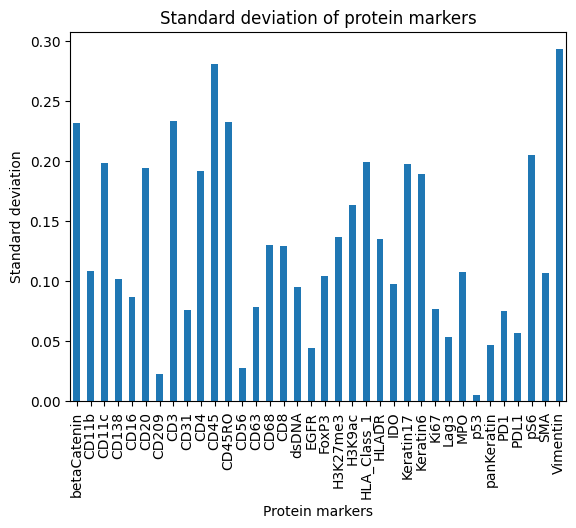

In [ ]:
# Let's explore the standard deviation of all protein markers
std_values = df_cl.std()

std_values.plot(kind='bar')
plt.xlabel('Protein markers')
plt.ylabel('Standard deviation')
plt.title('Standard deviation of protein markers')
plt.show()

Let's normalize all the protein markers. 

## Pre-processing

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(
    scaler.fit_transform(df_cl), 
    index=df_cl.index, 
    columns=df_cl.columns
    )

In [ ]:
X.head()

,betaCatenin,CD11b,CD11c,CD138,CD16,CD20,CD209,CD3,CD31,CD4,CD45,CD45RO,CD56,CD63,CD68,CD8,dsDNA,EGFR,FoxP3,H3K27me3,H3K9ac,HLA_Class_1,HLADR,IDO,Keratin17,Keratin6,Ki67,Lag3,MPO,p53,panKeratin,PD1,PDL1,pS6,SMA,Vimentin
cellID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cell_1405,-0.059620,-0.179608,-0.489912,-0.315784,-0.35004,2.707122,-0.081589,-0.100331,-0.225898,-0.292146,0.463241,0.473620,-0.041347,-0.209052,-0.485401,-0.348539,1.144389,-0.250764,-0.166031,1.943094,0.929675,-0.025347,1.114004,-0.209287,-0.402212,-0.476526,-0.209898,-0.104839,-0.175264,-0.015026,-0.209156,-0.29186,1.421848,1.185073,6.191382,0.799289
Cell_1406,-0.834284,-0.179608,1.149627,-0.315784,-0.35004,3.032982,-0.081589,1.122946,-0.225898,0.904567,1.090162,0.847155,-0.041347,-0.209052,-0.485401,-0.348539,0.433257,-0.250764,-0.166031,1.163050,0.387266,1.656732,1.529841,-0.209287,-0.402212,-0.476526,-0.209898,-0.104839,-0.175264,-0.015026,-0.209156,-0.29186,3.318148,1.069760,-0.243720,0.731554
Cell_1407,-0.834284,-0.179608,-0.531013,0.676825,-0.35004,1.034829,-0.081589,-0.168113,1.699210,-0.269828,0.566758,-0.133460,-0.041347,-0.209052,-0.485401,-0.348539,1.153740,-0.250764,-0.166031,1.159130,0.901215,-0.265023,0.826940,-0.209287,-0.402212,-0.476526,5.889349,-0.104839,-0.175264,-0.015026,-0.209156,-0.29186,2.345389,2.512817,-0.243720,-0.429223
Cell_1408,-0.428956,-0.086163,-0.531013,-0.315784,-0.35004,1.311617,-0.081589,-0.146789,-0.225898,-0.410891,0.263654,0.482917,-0.041347,-0.209052,-0.485401,-0.348539,0.873194,-0.250764,-0.166031,1.708254,1.152815,0.243621,0.399719,0.257245,-0.402212,-0.476526,-0.209898,-0.104839,-0.175264,-0.015026,-0.209156,-0.29186,0.885617,1.143323,-0.108878,1.046398
Cell_1409,-0.489940,-0.179608,1.166231,-0.315784,-0.35004,2.479698,-0.081589,0.152357,-0.225898,0.416786,1.247247,1.509263,-0.041347,-0.209052,-0.485401,-0.348539,0.603357,-0.250764,-0.166031,-0.445345,0.081301,1.994399,1.919682,-0.209287,-0.402212,-0.476526,-0.209898,-0.104839,-0.175264,-0.015026,-0.209156,-0.29186,1.170453,-0.220469,-0.243720,1.189928


## k-means Clustering

- We will use the k-means algorithm to cluster the cells based on the protein markers.

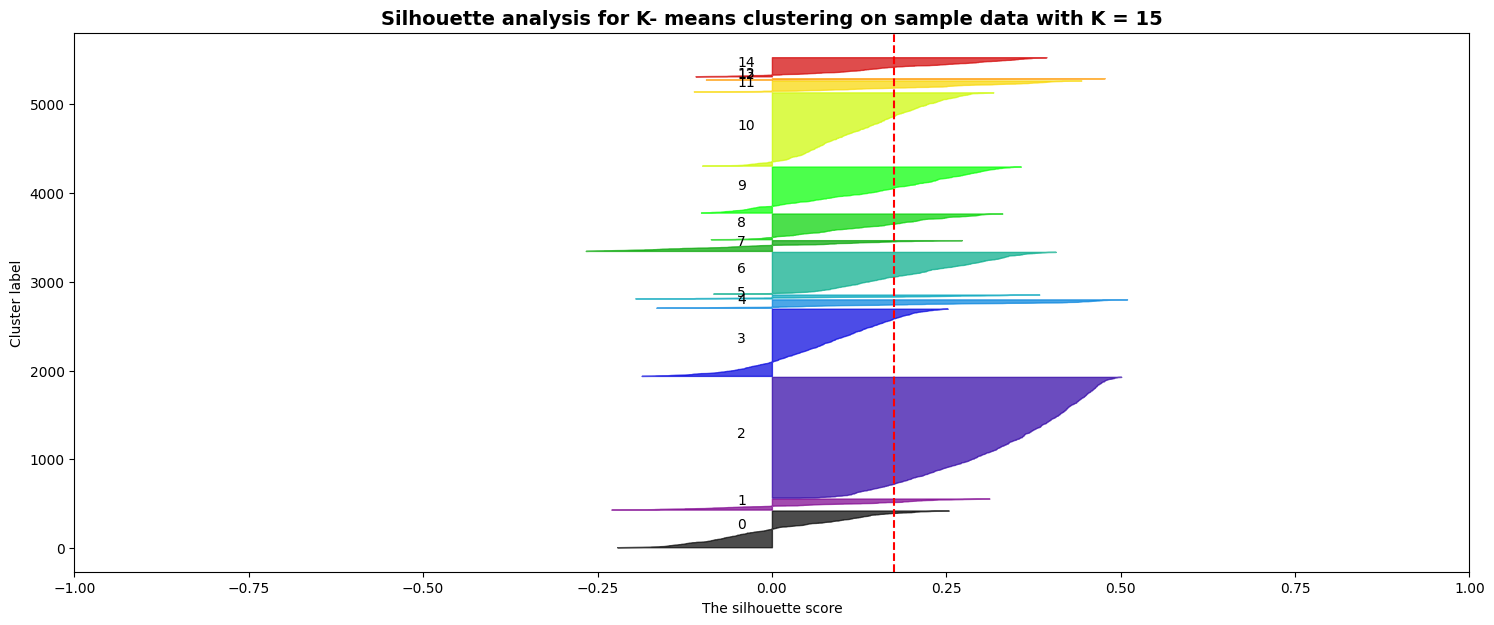

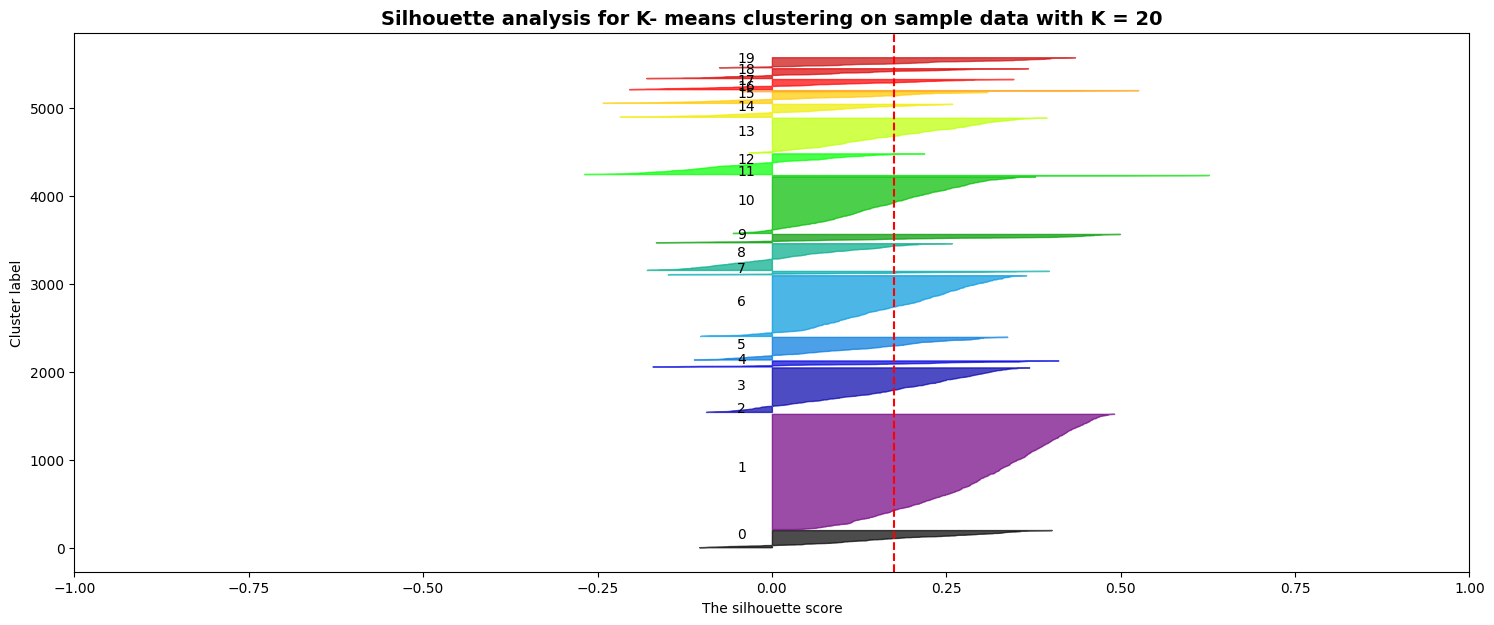

In [ ]:
range_n_clusters = [15, 20]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(X)
    # average silhouette score
    silhouette_avg_km = silhouette_score(X, cluster_labels_km)
    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-1, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            y=np.arange(y_lower, y_upper),
            x1=0,
            x2=ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next cluster silhouette scores
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette score")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for K- means clustering on sample data with K = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

I start with k = 2 or 3 clsuters, but observed that the silhouette score is less than 0.25 and there are negative values. So I increased the number of clsuters to 10 or 11, but the average silhouette score is still less than 0.25. However, the number of negative silhouette score is reduced. 

Let's use the PC scores for k-means clustering.

## PCA computation

In [ ]:
pca_X = PCA()
pca_X.fit(X)

PCA()

How many PCs? min{p, n-1} = min{36, 5380} = 36


In [ ]:
# number of PCs
pca_X.components_.shape[0]


36

In [ ]:
# Let's put the PC loading into a data frame. 
pca_loadings = pd.DataFrame(
    pca_X.fit(X).components_.T,
    index=X.columns,  
    columns=[f'PC{i+1}' for i in range(pca_X.n_components_)]
)

In [ ]:
# PC scores in a data frame
pc_scores = pd.DataFrame(
    pca_X.fit_transform(X), 
    index=X.index,
    columns=[f'PC{i+1}' for i in range(pca_X.n_components_)]
    )



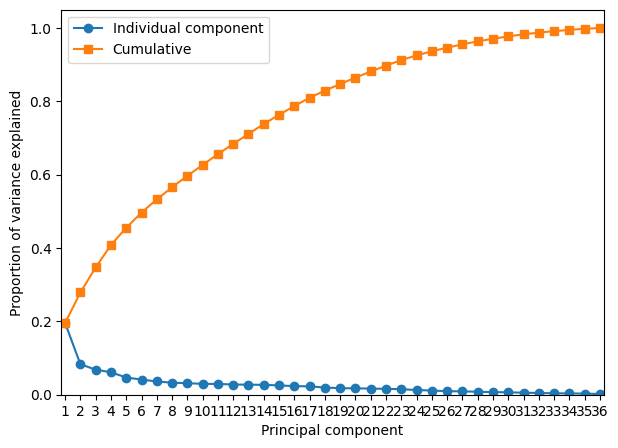

In [ ]:
# Let's find the variation explained by PCs
num_components = pca_X.n_components_
pc_indices = np.arange(1, num_components + 1)

plt.figure(figsize=(7,5))

plt.plot(pc_indices, pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(pc_indices, np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of variance explained')
plt.xlabel('Principal component')
plt.xlim(0.75, num_components + 0.25)
plt.ylim(0, 1.05)
plt.xticks(pc_indices)
plt.legend(loc=2)
plt.show()

Using the elbow rule, we select 9 principal components since the variance explained by the remaining PCs increases very slowly. However, the first nine PCs together account for 60% of the total variance in the data. 

In [ ]:
pc_scores_sel = pc_scores.copy()
pc_scores_sel = pc_scores_sel.iloc[:,0:9]

## k-means on PCs

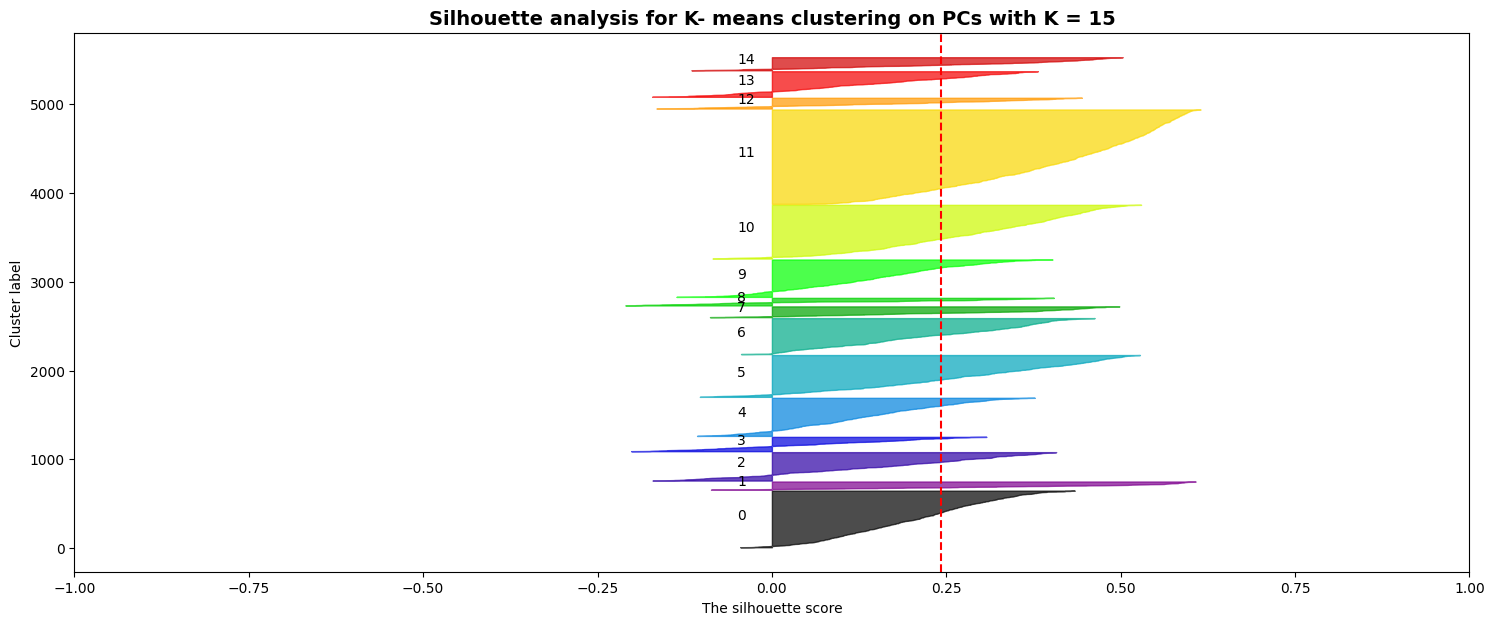

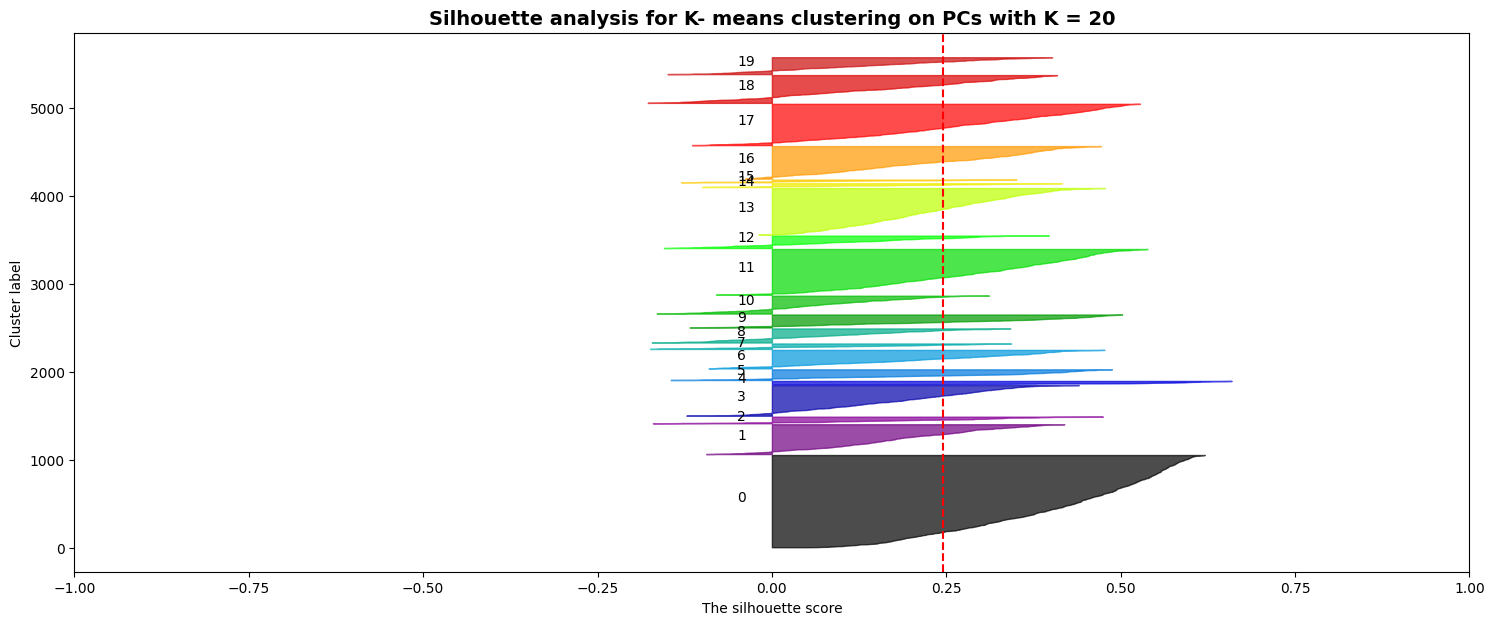

In [ ]:
range_n_clusters = [15, 20]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(pc_scores_sel)
    # average silhouette score
    silhouette_avg_km = silhouette_score(pc_scores_sel, cluster_labels_km)
    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pc_scores_sel, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-1, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            y=np.arange(y_lower, y_upper),
            x1=0,
            x2=ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next cluster silhouette scores
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette score")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for K- means clustering on PCs with K = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The silhouette score is 0.25, which is not very high. However, the number of negative silhouette scores is reduced when K=15.

## Hierarchical clustering on PCs

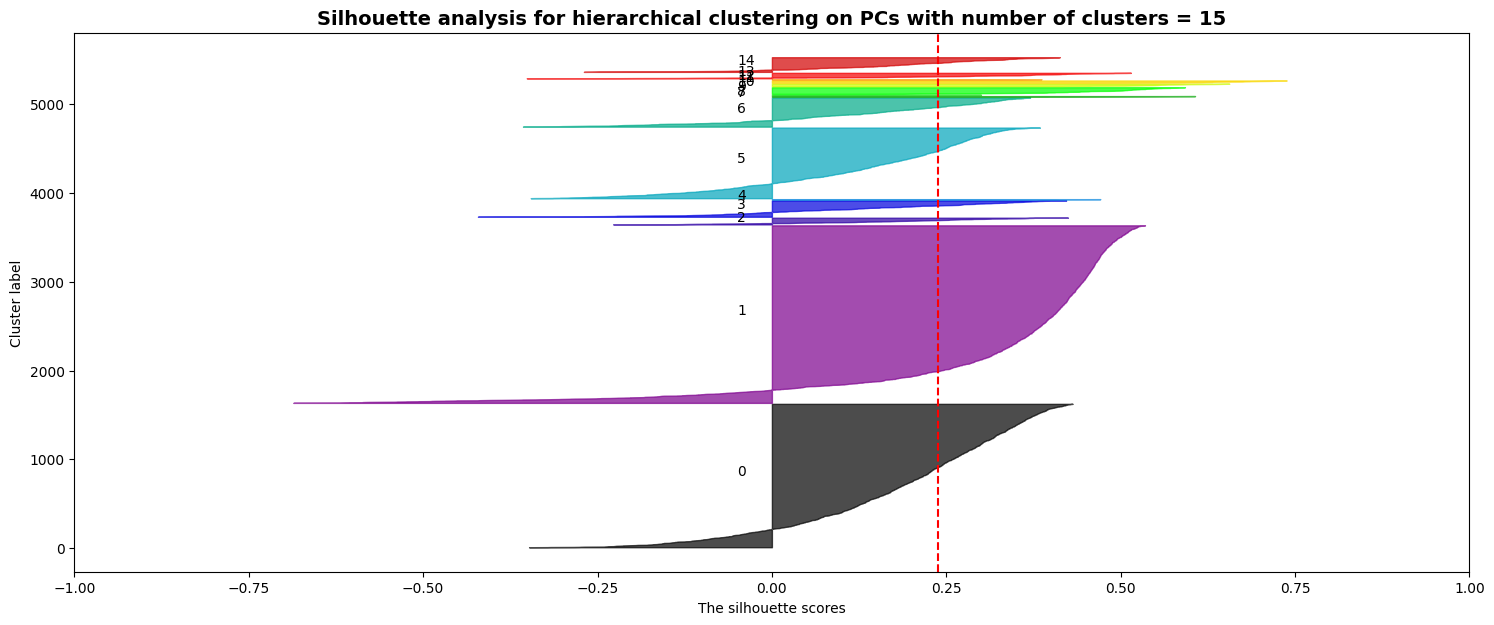

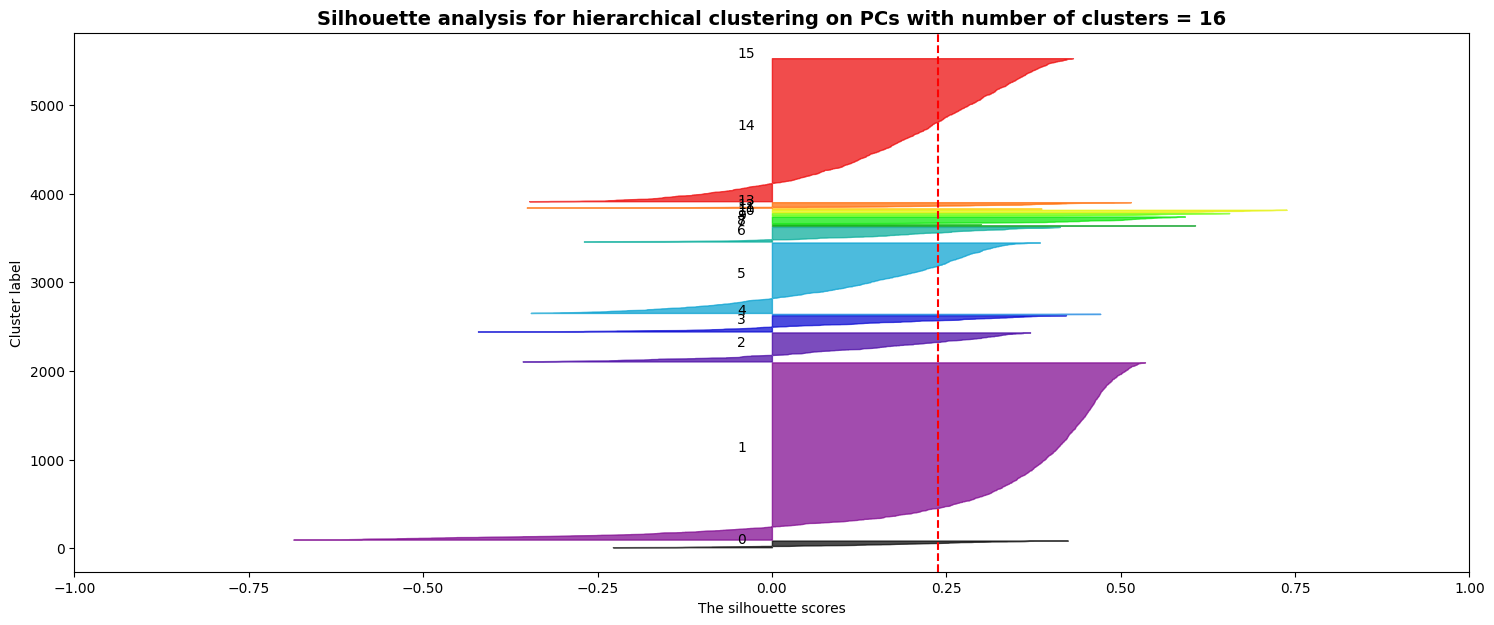

In [ ]:
range_n_clusters = range(15,17)
for n_clusters in range_n_clusters:
    model_hc = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
    cluster_labels_hc = model_hc.fit(pc_scores_sel)
    silhouette_avg_hc = silhouette_score(pc_scores_sel, cluster_labels_hc.labels_)
    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pc_scores_sel, cluster_labels_hc.labels_)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-1, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_hc.labels_ == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette scores")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_hc, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for hierarchical clustering on PCs with number of clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )



Compare to k-means, the negative silhouette scores are larger values. So we will choose k-means clustering on PCs with K = 15

## Clustering results visualization

In [ ]:
km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
cluster_labels_km = km.fit_predict(pc_scores_sel)

In [ ]:
# Let's add the cluster labels to the pc_scores_sel data frame
pc_scores_sel['cluster'] = cluster_labels_km
# Let's add the given cluster type to the data frame
pc_scores_sel['mm'] = df['mm']
pc_scores_sel.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,cluster,mm
cellID,,,,,,,,,,,
Cell_1405,2.227064,2.389205,-0.299471,-0.069992,0.720756,0.813461,3.659483,-1.187501,1.056981,9,B
Cell_1406,3.762831,0.027688,-1.634350,0.025217,0.974902,0.469048,0.537893,-0.951675,-1.659246,6,B
Cell_1407,1.950306,2.826844,-0.397545,0.304200,-0.035971,1.447015,-0.065576,2.904476,0.058301,2,B
Cell_1408,1.760245,1.840309,-0.403792,0.444981,0.976915,0.997743,0.346811,-0.225388,-0.621819,6,B
Cell_1409,2.870232,-1.013015,-1.114606,-0.390679,1.136687,0.299763,0.508067,-1.254702,-1.033980,0,B


In [ ]:
# adjusted rand index between cluster and cell types
rand_score(pc_scores_sel['cluster'], pc_scores_sel['mm'])

np.float64(0.8711442366746829)

We observe that the clustering results are consistent with the cell types provided in the dataset. Let's visualize the clustering results with the spatial coordinates provided in the dataset.

In [ ]:
# add the 'centroidX', 'centroidY' to df_scores_sel
pc_scores_sel['centroidX'] = df['centroidX']
pc_scores_sel['centroidY'] = df['centroidY']

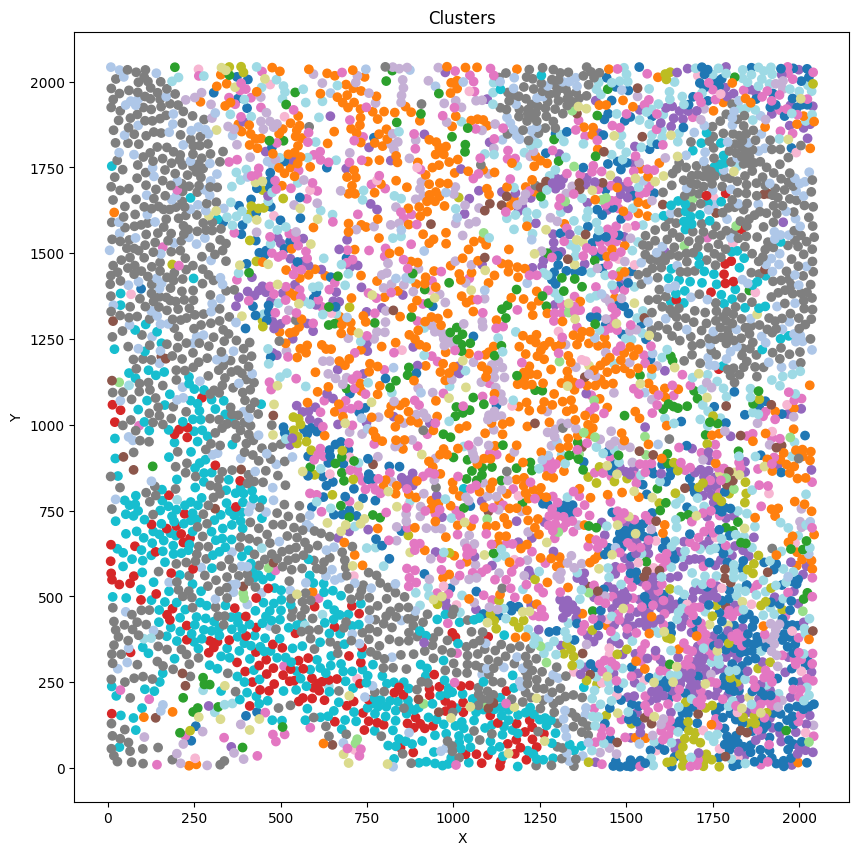

In [ ]:
# Let's visualize the clusters
plt.figure(figsize=(10, 10))
plt.scatter(
    pc_scores_sel['centroidX'], 
    pc_scores_sel['centroidY'], 
    c=pc_scores_sel['cluster'], 
    cmap='tab20'
    )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters')
plt.show()

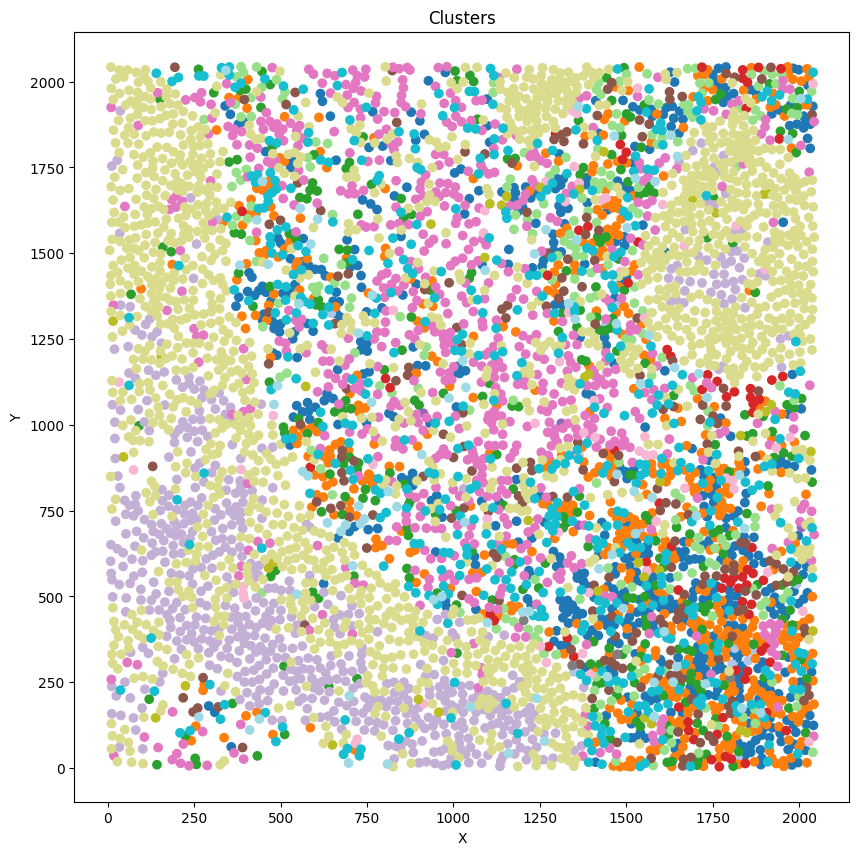

In [ ]:
# convert mm to factor
pc_scores_sel['mm'] = pc_scores_sel['mm'].astype('category').cat.codes
# Let's visualize the clusters
plt.figure(figsize=(10, 10))
plt.scatter(
    pc_scores_sel['centroidX'], 
    pc_scores_sel['centroidY'], 
    c=pc_scores_sel['mm'], 
    cmap='tab20'
    )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters')
plt.show()

The clustering results are consistent with the cell types provided in the dataset. Let's visualize the clustering results with the PC scores.

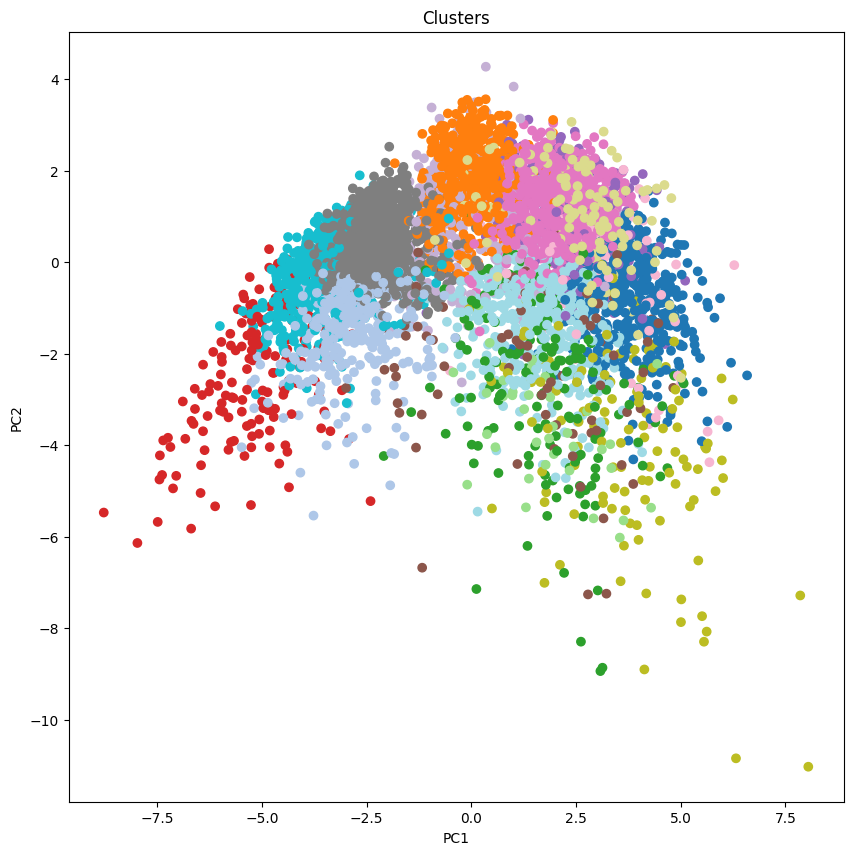

In [ ]:
# Let's visualize the clusters
plt.figure(figsize=(10, 10))
plt.scatter(
    pc_scores_sel['PC1'], 
    pc_scores_sel['PC2'], 
    c=pc_scores_sel['cluster'], 
    cmap='tab20'
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters')
plt.show()

Can we create a biplot of one protein marker on two PCs?


In [ ]:
pca_loadings.index

Index(['betaCatenin', 'CD11b', 'CD11c', 'CD138', 'CD16', 'CD20', 'CD209',
       'CD3', 'CD31', 'CD4', 'CD45', 'CD45RO', 'CD56', 'CD63', 'CD68', 'CD8',
       'dsDNA', 'EGFR', 'FoxP3', 'H3K27me3', 'H3K9ac', 'HLA_Class_1', 'HLADR',
       'IDO', 'Keratin17', 'Keratin6', 'Ki67', 'Lag3', 'MPO', 'p53',
       'panKeratin', 'PD1', 'PDL1', 'pS6', 'SMA', 'Vimentin'],
      dtype='object')

In [ ]:
# find row index of pc_loadings with name Keratin6
keratin6_idx = pca_loadings.index.get_loc('Keratin6')
keratin6_idx

25

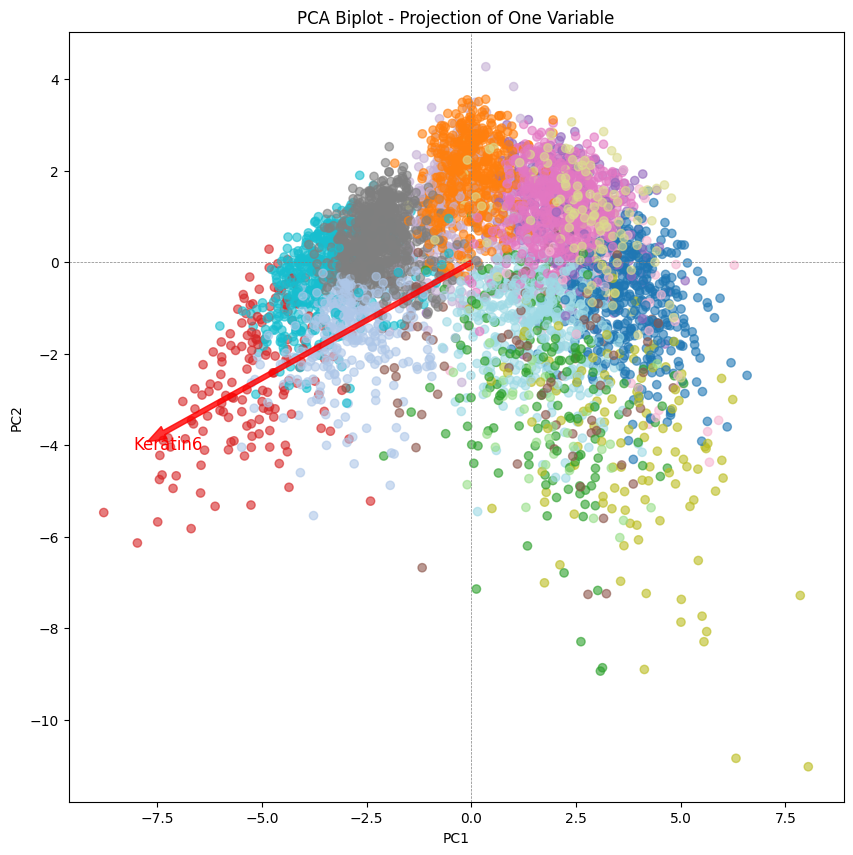

In [ ]:
# select a variable to visualize its loadings in a biplot
var_ind = 25  
var_name = pca_loadings.index[var_ind]  

# extract pc1 and pc2 loadings
pc1_loading = pca_loadings.loc[var_name, 'PC1']
pc2_loading = pca_loadings.loc[var_name, 'PC2']

# scaling factor to match visualization scale
scaling_factor = np.max(np.abs(pc_scores_sel[['PC1', 'PC2']])) / np.max(np.abs(pca_loadings.iloc[:, :2]))

# visualize the clusters on PCA scores
plt.figure(figsize=(10, 10))
plt.scatter(
    pc_scores_sel['PC1'], 
    pc_scores_sel['PC2'], 
    c=pc_scores_sel['cluster'], 
    cmap='tab20',
    alpha=0.6
)

# overlay the variable loading vector (scaled)
plt.arrow(0, 0, pc1_loading * scaling_factor, pc2_loading * scaling_factor, 
          color='red', width=0.1, head_width=0.3, alpha=0.8)
plt.text(pc1_loading * scaling_factor * 1.1, pc2_loading * scaling_factor * 1.1, 
         var_name, color='red', fontsize=12)


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot - Projection of One Variable')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

plt.show()


It seems the cell clusters in the third quadrant expresses high levels of Keratin 6.

This analysis can be refine using features selection or sparse clustering, or spatial clustering.

## References
- Jeganathan research lab projects.